In [91]:
import numpy as np

def calcular_metricas(y_real, y_pred):
  # Convertir las listas a arrays de NumPy para facilitar las operaciones
  y_real = np.array(y_real)
  y_pred = np.array(y_pred)

  # Calcular el MAE
  diferencias = np.abs(y_real - y_pred)
  mae = np.mean(diferencias)

  # Calcular el MSE
  diferencias_cuadradas = np.square(y_real - y_pred)
  mse = np.mean(diferencias_cuadradas)

  # Calcular el R²
  # Primero, calculamos la media de los valores reales
  media_real = np.mean(y_real)
  # Suma de cuadrados de los residuos (SSR)
  ssr = np.sum(np.square(y_real - y_pred))
  # Suma de cuadrados totales (SST)
  sst = np.sum(np.square(y_real - media_real))
  # Calculamos R²
  r2 = 1 - (ssr / sst)

  return {'MAE': mae, 'MSE': mse, 'R²': r2}

# Ejemplo de uso
y_real = [3.0, -0.5, 2.0, 7.0]
y_pred = [2.5, 0.0, 2.0, 8.0]

metricas = calcular_metricas(y_real, y_pred)
print(metricas)

{'MAE': 0.5, 'MSE': 0.375, 'R²': 0.9486081370449679}


Error absoluto Medio MAE

In [92]:
# Datos de ejemplo
valores_reales = [3.0, -0.5, 2.0, 7.0]
valores_predichos = [2.5, 0.0, 2.0, 8.0]

    # Calcular las diferencias absolutas
diferencias=abs(3.0-2.5) + abs(-0.5-0.0) + abs(2.0-2.0) + abs(7.0-8.0)
mae=diferencias/4
print("El MAE es:", mae)



El MAE es: 0.5


El Error Cuadrático Medio (MSE),
MSE = (1/n) * Σ(yᵢ - ŷᵢ)²

In [93]:
# Datos de ejemplo
valores_reales = [3.0, -0.5, 2.0, 7.0]
valores_predichos = [2.5, 0.0, 2.0, 8.0]

diferencias=(3.0-2.5)**2 + (-0.5-0.0)**2 + (2.0-2.0)**2 + (7.0-8.0)**2
mse=diferencias/4
print("El MSE es:", mse)

El MSE es: 0.375


R² = 1 - (SSR / SST)
SSR (Suma de Cuadrados de los Residuales): Es la suma de las diferencias al cuadrado entre los valores observados y los valores predichos por el modelo.
SST (Suma Total de Cuadrados): Es la suma de las diferencias al cuadrado entre los valores observados y la media de los valores observados.

In [94]:
# Datos de ejemplo
valores_reales = [3.0, -0.5, 2.0, 7.0]
valores_predichos = [2.5, 0.0, 2.0, 8.0]
#Calcular la media de los valores reales (ȳ):
ȳ = (3.0 + (-0.5) + 2.0 + 7.0) / 4
print(ȳ)

#Calcular los residuales (yᵢ - ŷᵢ) y elevarlos al cuadrado me da el ssr:
ssr=(3.0-2.5)**2 + (-0.5-0.0)**2 + (2.0-2.0)**2 + (7.0-8.0)**2
print(ssr)

#Calcular las diferencias entre los valores reales y la media, y elevarlas al cuadrado:

sst=(3.0-2.875)**2 + (-0.5-2.875)**2 + (2.0-2.875)**2 + (7.0-2.875)**2
print(sst)
r_cuadrado=1-(ssr/sst)
print("El R² es:", r_cuadrado)


2.875
1.5
29.1875
El R² es: 0.9486081370449679


In [95]:
import pandas as pd
import sklearn
import seaborn as sns


df_helados = pd.read_csv("IceCreamData.csv")
#df_helados.head()
df_helados

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [96]:
from sklearn.model_selection import train_test_split

# extrayendo la información del dataset
X = df_helados[["Temperature"]]
y = df_helados["Revenue"]

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(375, 1)


In [97]:
from sklearn.linear_model import LinearRegression

# crear el modelo
regressor = LinearRegression(fit_intercept = True)
# entrenarlo con los datos
regressor.fit(X_train, y_train)

# el modelo tendrá dos parámetros (A y B fueron llamados en el documento)
# se pueden mostrar con la función print
print(f"La pendiente del modelo (B) es: {regressor.coef_}, el intersecto (A) es {regressor.intercept_}")


La pendiente del modelo (B) es: [21.50561151], el intersecto (A) es 43.75964309698088


Text(0.5, 1.0, 'Ingresos por ventas de helados respecto a la temperatura')

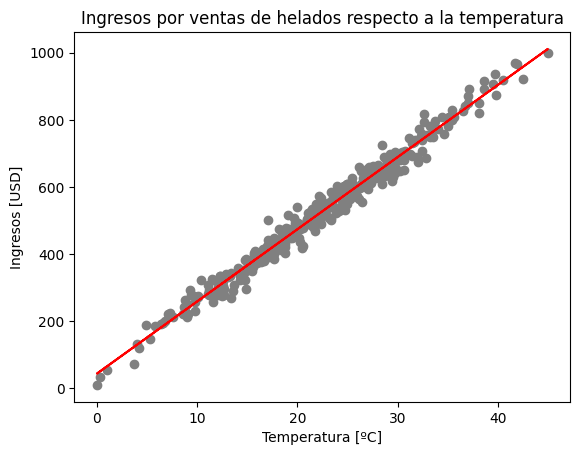

In [98]:
import matplotlib.pyplot as plt
y_pred = regressor.predict(X_test)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Ingresos [USD]')
plt.xlabel('Temperatura [ºC]')
plt.title('Ingresos por ventas de helados respecto a la temperatura')


Error medio cuadrático

In [99]:
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_test, y_pred))

R^2: 0.9780766432700229


error cuadratico medio con la formula hecha en clase

In [100]:
import numpy as np
# Datos de ejemplo
valores_reales = [y_test]
valores_predichos = [y_pred]
# Calcular el MSE
mse = np.mean((np.array(y_test) - np.array(y_pred))**2)

print("El MSE es:", mse)

El MSE es: 620.9972808077426


Tarea: Hacer manualmente la verificación de las formulas de la matriz de confusión (comparar reporte de Python con sus resultados)
Hacer un ejemplo con matriz de 2x2 (y opcinalmente 3x3)